# MSDS 7331 Data Mining Lab 1
Profesor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Afreen Siddiqui, & Eduardo Cantu

In [74]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

## Business Understanding


## Data Meaning Type

## Data Quality

In [75]:


# read in the data from 2015 and 2016
Accident_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)

#Accident_df = Accident_df.drop(columns='Unnamed: 0')
#Data frame description 
Accident_df.head()
#Accident_df.info()



,Unnamed: 0,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,0,4,Arizona,40484,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,0,2016-07-16 14:01:00+00:00
1,1,4,Arizona,40615,1,1,0,1,1,1,...,88,0,None,0,None,0,None,1,0,2016-08-28 02:33:00+00:00
2,2,4,Arizona,40610,1,1,0,0,0,3,...,99,0,None,0,None,0,None,2,0,2016-08-16 08:50:00+00:00
3,3,4,Arizona,40140,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,1,2016-02-13 00:00:00+00:00
4,4,4,Arizona,40606,1,1,0,0,0,2,...,99,0,None,0,None,0,None,1,0,2016-08-09 21:07:00+00:00


In [76]:
#check for duplicate recoreds

Accident_df['consecutive_number'].value_counts()



270332    1
120240    1
122257    1
220162    1
62868     1
130453    1
60823     1
40345     1
480672    1
220577    1
550310    1
290215    1
200107    1
210348    1
482828    1
470447    1
122289    1
470415    1
62900     1
130485    1
60855     1
40377     1
370110    1
110015    1
480704    1
220609    1
280002    1
550342    1
290247    1
200139    1
         ..
121454    1
220088    1
10864     1
80498     1
481263    1
450180    1
420472    1
490106    1
483310    1
410237    1
481918    1
371328    1
390196    1
230021    1
170630    1
122823    1
260746    1
62091     1
510604    1
121486    1
10896     1
80530     1
400022    1
420504    1
490138    1
410269    1
481950    1
230053    1
170662    1
131072    1
Name: consecutive_number, Length: 34439, dtype: int64

## Simple Statistics

37461 death in this data set. 43% of people involved in a accident die 

In [77]:
# Number of people who died in a car accident based on the given data for 2016 
percentDeath = float(sum(Accident_df.number_of_fatalities)/(sum(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit)+sum(Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)) * 100)
Deaths = sum(Accident_df.number_of_fatalities)
print('Number of people who died in a car accident in 2016: ', Deaths , percentDeath)



Number of people who died in a car accident in 2016:  37461 43.81608496303921


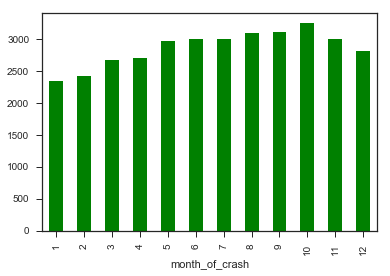

In [78]:
# Monthly data for accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False)

In [79]:
#top 4 month of accidents
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4)

,number_of_fatalities
month_of_crash,
10,3526
8,3349
9,3344
6,3306


In [80]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index()

acci_count.rename(columns={'Unnamed: 0': 'accident_count'}, inplace=True)
#acci_count
#type(acci_count)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


,month_of_crash,accident_count,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
9,10,3249,3249,3249,3249,3249,3249,3249,3249,3249,...,3249,3249,3249,3249,3249,3249,3249,3249,3249,3249
8,9,3120,3120,3120,3120,3120,3120,3120,3120,3120,...,3120,3120,3120,3120,3120,3120,3120,3120,3120,3120
7,8,3106,3106,3106,3106,3106,3106,3106,3106,3106,...,3106,3106,3106,3106,3106,3106,3106,3106,3106,3106
6,7,3008,3008,3008,3008,3008,3008,3008,3008,3008,...,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008


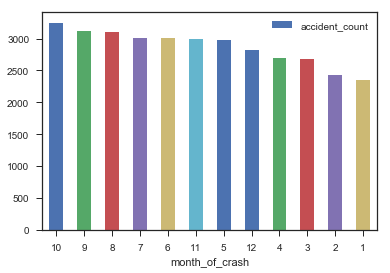

In [81]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0)

In [82]:
#state wise analysis for fatal accidents:
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted.head(10)

,state_name,accident_count_bystate,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
43,Texas,3407,3407,3407,3407,3407,3407,3407,3407,3407,...,3407,3407,3407,3407,3407,3407,3407,3407,3407,3407
4,California,3357,3357,3357,3357,3357,3357,3357,3357,3357,...,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357
9,Florida,2933,2933,2933,2933,2933,2933,2933,2933,2933,...,2933,2933,2933,2933,2933,2933,2933,2933,2933,2933
10,Georgia,1422,1422,1422,1422,1422,1422,1422,1422,1422,...,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422
33,North Carolina,1348,1348,1348,1348,1348,1348,1348,1348,1348,...,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348
38,Pennsylvania,1088,1088,1088,1088,1088,1088,1088,1088,1088,...,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
35,Ohio,1053,1053,1053,1053,1053,1053,1053,1053,1053,...,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053
13,Illinois,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
22,Michigan,980,980,980,980,980,980,980,980,980,...,980,980,980,980,980,980,980,980,980,980
42,Tennessee,966,966,966,966,966,966,966,966,966,...,966,966,966,966,966,966,966,966,966,966


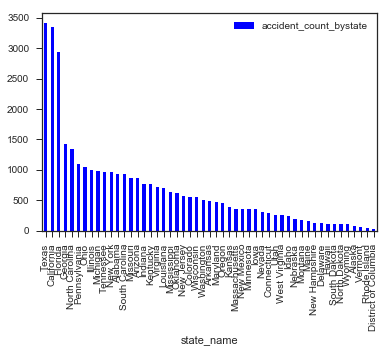

In [83]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'])

In [84]:
#Hour of accidents
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted.head(10)

,hour_of_crash,accident_count_bytime,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
18,18,1984,1984,1984,1984,1984,1984,1984,1984,1984,...,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984
20,20,1919,1919,1919,1919,1919,1919,1919,1919,1919,...,1919,1919,1919,1919,1919,1919,1919,1919,1919,1919
17,17,1913,1913,1913,1913,1913,1913,1913,1913,1913,...,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913
19,19,1902,1902,1902,1902,1902,1902,1902,1902,1902,...,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902
16,16,1808,1808,1808,1808,1808,1808,1808,1808,1808,...,1808,1808,1808,1808,1808,1808,1808,1808,1808,1808
21,21,1801,1801,1801,1801,1801,1801,1801,1801,1801,...,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801
15,15,1731,1731,1731,1731,1731,1731,1731,1731,1731,...,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731
22,22,1650,1650,1650,1650,1650,1650,1650,1650,1650,...,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650
14,14,1567,1567,1567,1567,1567,1567,1567,1567,1567,...,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
13,13,1514,1514,1514,1514,1514,1514,1514,1514,1514,...,1514,1514,1514,1514,1514,1514,1514,1514,1514,1514


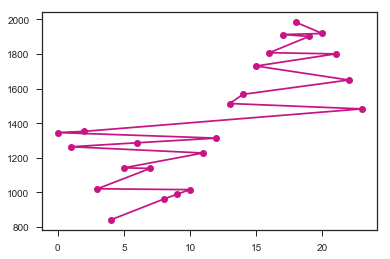

In [85]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] != 99]
plt.plot( 'hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


In [86]:
#Location of accident 
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted.head(10)

,route_signing_name,accident_count_byloc,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
6,State Highway,10234,10234,10234,10234,10234,10234,10234,10234,10234,...,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
3,Local Street – Municipality,6104,6104,6104,6104,6104,6104,6104,6104,6104,...,6104,6104,6104,6104,6104,6104,6104,6104,6104,6104
7,U.S. Highway,5490,5490,5490,5490,5490,5490,5490,5490,5490,...,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490
0,County Road,5160,5160,5160,5160,5160,5160,5160,5160,5160,...,5160,5160,5160,5160,5160,5160,5160,5160,5160,5160
1,Interstate,4295,4295,4295,4295,4295,4295,4295,4295,4295,...,4295,4295,4295,4295,4295,4295,4295,4295,4295,4295
4,Local Street – Township,1541,1541,1541,1541,1541,1541,1541,1541,1541,...,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541
5,Other,1138,1138,1138,1138,1138,1138,1138,1138,1138,...,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138
2,Local Street – Frontage Road (Since 1994),297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
8,Unknown,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


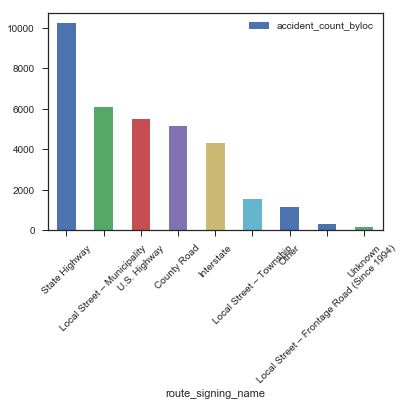

In [87]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, rot=45)

In [88]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted.head(10)

,manner_of_collision_name,accident_count_bytype,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
3,Not Collision with Motor Vehicle in Transport ...,21296,21296,21296,21296,21296,21296,21296,21296,21296,...,21296,21296,21296,21296,21296,21296,21296,21296,21296,21296
0,Angle,6122,6122,6122,6122,6122,6122,6122,6122,6122,...,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122
1,Front-to-Front,3511,3511,3511,3511,3511,3511,3511,3511,3511,...,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511
2,Front-to-Rear,2350,2350,2350,2350,2350,2350,2350,2350,2350,...,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
9,Sideswipe – Same Direction,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519
8,Sideswipe – Opposite Direction,421,421,421,421,421,421,421,421,421,...,421,421,421,421,421,421,421,421,421,421
5,Other (End-Swipes and Others),86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
10,Unknown,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
7,Rear-to-Side,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
4,Not Reported,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


In [89]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)

,light_condition_name,accident_count_bylight,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
4,Daylight,16336,16336,16336,16336,16336,16336,16336,16336,16336,...,16336,16336,16336,16336,16336,16336,16336,16336,16336,16336
1,Dark – Not Lighted,9494,9494,9494,9494,9494,9494,9494,9494,9494,...,9494,9494,9494,9494,9494,9494,9494,9494,9494,9494
0,Dark – Lighted,6732,6732,6732,6732,6732,6732,6732,6732,6732,...,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732
5,Dusk,803,803,803,803,803,803,803,803,803,...,803,803,803,803,803,803,803,803,803,803
3,Dawn,595,595,595,595,595,595,595,595,595,...,595,595,595,595,595,595,595,595,595,595
2,Dark – Unknown Lighting,262,262,262,262,262,262,262,262,262,...,262,262,262,262,262,262,262,262,262,262
8,Unknown,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
6,Not Reported,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
7,Other,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


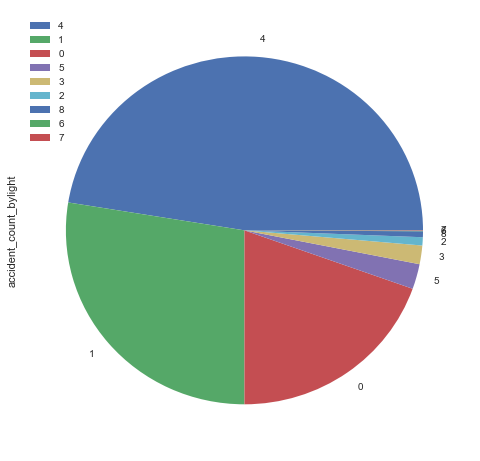

In [90]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(8, 8))

In [91]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted.head(10)

,atmospheric_conditions_name,accident_count_byatm,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
2,Clear,24620,24620,24620,24620,24620,24620,24620,24620,24620,...,24620,24620,24620,24620,24620,24620,24620,24620,24620,24620
3,Cloudy,4961,4961,4961,4961,4961,4961,4961,4961,4961,...,4961,4961,4961,4961,4961,4961,4961,4961,4961,4961
8,Rain,2148,2148,2148,2148,2148,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
6,Not Reported,1634,1634,1634,1634,1634,1634,1634,1634,1634,...,1634,1634,1634,1634,1634,1634,1634,1634,1634,1634
11,Snow,350,350,350,350,350,350,350,350,350,...,350,350,350,350,350,350,350,350,350,350
4,"Fog, Smog, Smoke",329,329,329,329,329,329,329,329,329,...,329,329,329,329,329,329,329,329,329,329
12,Unknown,183,183,183,183,183,183,183,183,183,...,183,183,183,183,183,183,183,183,183,183
10,"Sleet, Hail",66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
7,Other,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
9,Severe Crosswinds,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


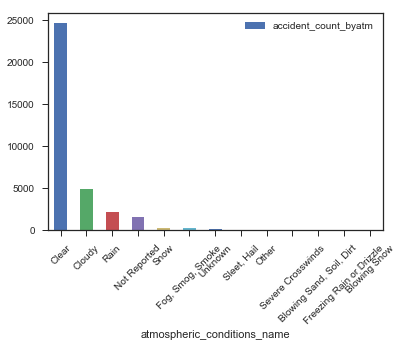

In [92]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, rot=45)

In [93]:
Fatal accidents are likely to happened in regular or cloudy or rainy times

SyntaxError: invalid syntax (<ipython-input-93-202752f27175>, line 1)

In [ ]:
From the above statistics on data we analysed that more number of accidents happens during the months July, August 
and October and in the evening hours. Fatal accidents  are more likely to happen on the state highways and maximum 
count for the accidents is for Texas state followed by California and Florida. 

## Visualize Attributes

In [ ]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

In [ ]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

The correlation heat map is great for finding relationship with many attributes 

In [ ]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.heatmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
#Initiate boxplot 
ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')
# clean up titles
ax.set_xscale
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
#
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:


#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, 
               split=True, inner="quart")

## Explore Joint Attributes

## Explore Attributes and Class

## New Features

In [102]:
#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()


light_condition  light_condition_name     Day_Time_Yes_No
1                Daylight                 yes                16336
2                Dark – Not Lighted       no                  9494
3                Dark – Lighted           no                  6732
4                Dawn                     yes                  595
5                Dusk                     yes                  803
6                Dark – Unknown Lighting  no                   262
7                Other                    no                    14
dtype: int64

In [101]:


Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

Accident_df.head()

,Unnamed: 0,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Day_Time_Yes_No,Fatalities ratio,Fatalities_ratio
0,0,4,Arizona,40484,1,1,0,0,0,1,...,0,None,0,None,1,0,2016-07-16 14:01:00+00:00,yes,43.816085,100.000000
1,1,4,Arizona,40615,1,1,0,1,1,1,...,0,None,0,None,1,0,2016-08-28 02:33:00+00:00,no,43.816085,50.000000
2,2,4,Arizona,40610,1,1,0,0,0,3,...,0,None,0,None,2,0,2016-08-16 08:50:00+00:00,yes,43.816085,66.666667
3,3,4,Arizona,40140,1,1,0,0,0,1,...,0,None,0,None,1,1,2016-02-13 00:00:00+00:00,NaN,43.816085,100.000000
4,4,4,Arizona,40606,1,1,0,0,0,2,...,0,None,0,None,1,0,2016-08-09 21:07:00+00:00,no,43.816085,50.000000


## Exceptional Work